Q. 9

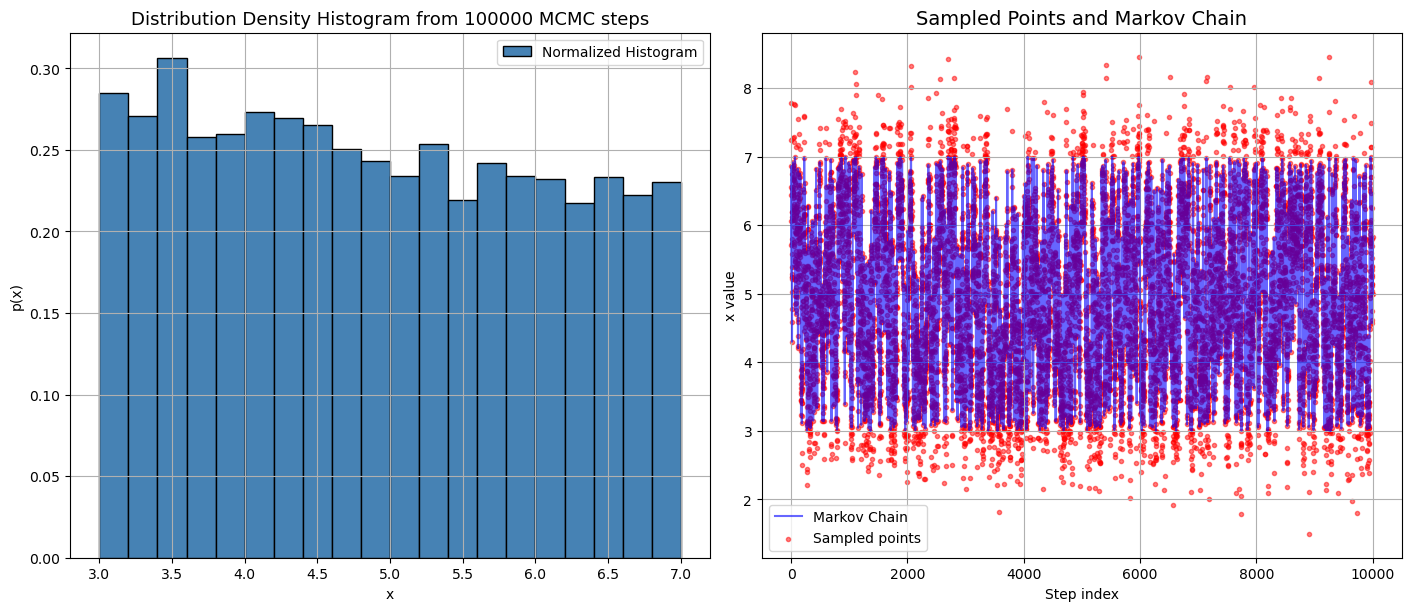

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as r

# Target distribution
def f(x):
    if 3.0 < x < 7.0:
        return 1.0
    else:
        return 0.0

# Parameters
steps = 10000  # Number of MCMC steps
x_0 = 5.0  # Starting value, should be within the range (3, 7)
proposal_width = 0.5  # Standard deviation of the proposal distribution

# Arrays to store the results
points_sampled = np.zeros(steps)
markov_chain = []

# Initialize
x = x_0

# Metropolis algorithm
for i in range(steps):
    x_p = x + r.normal(loc=0.0, scale=proposal_width)
    points_sampled[i] = x_p
    if f(x_p) / f(x) > r.rand():
        x = x_p
    markov_chain.append(x)

# Convert to numpy array
markov_chain = np.array(markov_chain)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)

# Histogram of the sampled points
ax1.set_title("Distribution Density Histogram from 100000 MCMC steps", size=13)
ax1.hist(markov_chain, bins=20, density=True, facecolor='steelblue', edgecolor='black', label='Normalized Histogram')
ax1.set_xlabel("x")
ax1.set_ylabel("p(x)")
ax1.grid(True)
ax1.legend()

# Markov Chain plot
ax2.set_title("Sampled Points and Markov Chain", size=14)
ax2.plot(markov_chain, label='Markov Chain', color='blue', alpha=0.6)
ax2.scatter(np.arange(steps), points_sampled, marker='.', color='red', label="Sampled points", alpha=0.5)
ax2.set_xlabel("Step index")
ax2.set_ylabel("x value")
ax2.legend()
ax2.grid(True)

plt.show()

# The blue line shows the progression of the Markov Chain (accepted points).
# The red dots represent all the points that were sampled (both accepted and proposed).